(array([  46, 1254, 1886, 2215, 2450]), {'prominences': array([0.037403, 0.024402, 0.002   , 0.002   , 0.035602]), 'left_bases': array([  39,  178, 1854, 2159,  178]), 'right_bases': array([ 148, 2424, 2424, 2424, 2499])})


(0.475, 0.525)

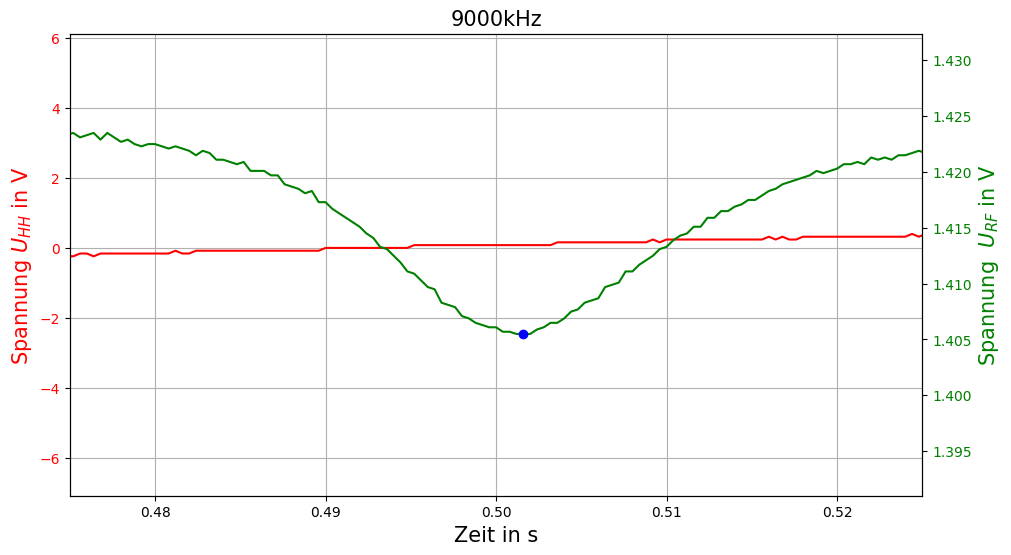

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.gridspec import GridSpec
import csv

class LandeFaktor:
    def __init__(self,path):
        self.path = path
        self.file = open(self.path)
        self.file = csv.reader(self.file,delimiter='\t')
        self.time = []
        self.channel1 = []
        self.channel2 =[]
        for line in self.file:
            self.time.append(float(line[0]))
            self.channel1.append(float(line[1]))
            self.channel2.append(float(line[2]))
        self.time = np.array(self.time)
        self.channel1 = np.array(self.channel1)
        self.channel2= np.array(self.channel2)

    def findpeaksauto(self):
        peaks = find_peaks(-self.channel2,prominence=0.0019,distance=5)
        print(peaks)
        return peaks

    def give_current(self,peaks):
        widerstand = 1.745
        return self.channel1[peaks[0]] / widerstand

    def get_b(self,peaks):
        current = self.give_current(peaks)
        mu0 = 1.256637061e-6
        N = 80
        r = 0.09
        B = mu0*(4/5)**(3/2) * N/r * current
        return B

    def plotwithpeaks(self,peaks,findpeaks = False):
        if findpeaks:
            peaks,_ = self.findpeaksauto()
        fig = plt.figure(figsize=(11,6))
        gs = GridSpec(8,5)
        fig1 = fig.add_subplot(gs[:,:])
        fig1.set_title(str(self.path)[31:], fontsize = 15)

        fig1.set_xlabel('Zeit in s',fontsize = 15)
        fig1.set_ylabel(r'Spannung $U_{HH}$ in V',color = 'r', fontsize = 15)
        fig1.tick_params(axis='y',labelcolor='r')
        fig1.plot(self.time, self.channel1,'r-', label = 'Channel 1')
        fig1.grid(True)

        fig2 = fig1.twinx()
        fig2.set_ylabel(r'Spannung  $U_{RF}$ in V',color='g',fontsize=15)
        fig2.tick_params(axis='y',labelcolor = 'g')
        fig2.plot(self.time,self.channel2,'g',label='Channel 2')
        for peak in peaks:
            plt.plot(self.time[peak],self.channel2[peak],'bo')

lande2500 = LandeFaktor('230508_OptischesPumpen/Resonanz9000kHz')
peaks = [988,1076,1423,1512]
lande2500.plotwithpeaks(peaks,findpeaks=True)
#print(lande2500.get_b(lande2500.findpeaksauto()))

'''
dateien = np.arange(500,9500,500)
Ru85 = []
Ru185 = []
Ru87 =[]
Ru187=[]
for datei in dateien:
    lande = LandeFaktor('230508_OptischesPumpen/Resonanz'+str(datei)+'kHz')
    b_peaks = lande.get_b(lande.findpeaksauto())
    Ru85.append(b_peaks[1])
    Ru185.append(b_peaks[-2])
    Ru87.append(b_peaks[2])
    Ru187.append(b_peaks[-3])
plt.plot(dateien*1000,Ru85,'b.',label='Ru85')
plt.plot(dateien*1000,Ru87,'rv',label='Ru87')
plt.plot(dateien*1000,Ru185,'b.',label='Ru85_1')
plt.plot(dateien*1000,Ru187,'rv',label='Ru87_1')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Magnetfel in T')

fit,err = np.polyfit(dateien*1000,Ru185,deg=1,cov = True)
a = fit[0]
b=fit[1]
print(a)
h = 6.626e-34
mub = 9.274e-24
print(h/(mub*a))
yseq = a*dateien*1000+b
plt.plot(dateien*1000,yseq)
plt.legend()
'''
plt.xlim(0.475,0.525)


In [51]:
7//2


3